In [579]:
#import all necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [580]:
#import ratings dataset in a dataframe and printing first 5 rows
ratings_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Edureka/certification project/ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [581]:
#importing movies dataset in a dataframe and printing first 5 rows

movie_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Edureka/certification project/movies.csv")
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [582]:
#merge the to csvs based on movieID column as that is common on both and checking by printing first five rows
movie_data=pd.merge(ratings_df,movie_df,on='movieId',how='inner')
movie_data.head()
# ratings_df.shape,movie_df.shape,movie_data.shape

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


In [583]:
movie_data[movie_data['title']=="'Til There Was You (1997)"]['rating'].mean()

4.0

In [584]:
#checking the number of unique movie ids
movie_data.movieId.nunique()

10325

In [585]:
#checking the total number of unique users
movie_data.userId.nunique()

668

In [586]:
#average rating with respect to each genre
genre_df_grpby=pd.DataFrame(movie_data.groupby('genres')['rating'].mean())

In [587]:
genre_df_grpby.sort_values(by='rating',inplace=True,ascending=False)

genre_df_grpby.head()

,rating
genres,
Comedy|Crime|Drama|Fantasy,5.0
Action|Adventure|Comedy|Crime|Romance|Thriller,5.0
Crime|Mystery|War,5.0
Animation|Fantasy|Sci-Fi|Thriller,5.0
Action|Comedy|Drama|Romance,5.0


In [588]:
#total movies count for each genre
total_movie_grpby_genre=pd.DataFrame(movie_data.groupby('genres')['title'].count())

In [589]:
total_movie_grpby_genre.sort_values(by='title',inplace=True,ascending=False)
total_movie_grpby_genre.head()

,title
genres,
Drama,7678
Comedy,6676
Comedy|Romance,3733
Drama|Romance,3407
Comedy|Drama,3101


In [590]:
#unique genres
movie_data.genres.unique()

array(['Crime|Drama', 'Drama|Sci-Fi', 'Mystery|Sci-Fi|Thriller',
       'Mystery|Thriller', 'Crime|Mystery|Thriller', 'Action|Drama|War',
       'Adventure|Drama|IMAX', 'Drama|Thriller|War',
       'Action|Crime|Thriller', 'Action', 'Comedy', 'Comedy|Sci-Fi',
       'Action|Adventure|Sci-Fi', 'Drama', 'Comedy|Crime|Drama|Thriller',
       'Action|Crime|Drama|Thriller', 'Comedy|Drama|Romance|War',
       'Action|Romance|Thriller',
       'Action|Adventure|Comedy|Romance|Thriller', 'Thriller',
       'Action|Adventure|Sci-Fi|Thriller', 'Drama|War', 'Action|Sci-Fi',
       'Adventure|Drama|Western', 'Crime|Horror|Thriller',
       'Comedy|Romance', 'Action|Adventure|Mystery|Thriller',
       'Drama|Fantasy|Horror|Thriller',
       'Action|Adventure|Romance|Thriller', 'Drama|Romance',
       'Horror|Sci-Fi|Thriller', 'Adventure|Comedy|Fantasy',
       'Action|Adventure', 'Action|Comedy|Musical', 'Comedy|Drama',
       'Horror', 'Comedy|Fantasy|Romance', 'Crime|Thriller|War',
       'Advent

In [591]:
#number of unique genre 
movie_data.genres.nunique()

938

In [592]:
#create a dataframe for analysis, finding the mean rating of the movie, finding the number of ratings given to particular movie 
trend=pd.DataFrame(movie_data.groupby('title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count()) 
trend.head()

,rating,total number of ratings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


In [593]:
#checking the number of null value with respect to each column in the trend dataframe
trend.isnull().sum()

rating                     0
total number of ratings    0
dtype: int64

In [594]:
#checking the details of trend dataframe
trend.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10323 entries, '71 (2014) to À nous la liberté (Freedom for Us) (1931)
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rating                   10323 non-null  float64
 1   total number of ratings  10323 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 241.9+ KB


In [595]:
#printing the range if of avg rating column
trend.rating.max(),trend.rating.min()

(5.0, 0.5)

In [596]:
#printing column names of trend dataframe
trend.columns

Index(['rating', 'total number of ratings'], dtype='object')

In [597]:
#checking how many movies are there average rating minimum 4.2 and mininum total number of ratings 150
trend_ratings_gt_4_no_200=trend[(trend['rating']>=4.2)&(trend['total number of ratings']>=150)]
print("Number of movies::",trend_ratings_gt_4_no_200.shape[0])

Number of movies:: 9


Text(0.5, 1.0, 'movies with average rating minimum 4.2 and mininum  total number of ratings 150')

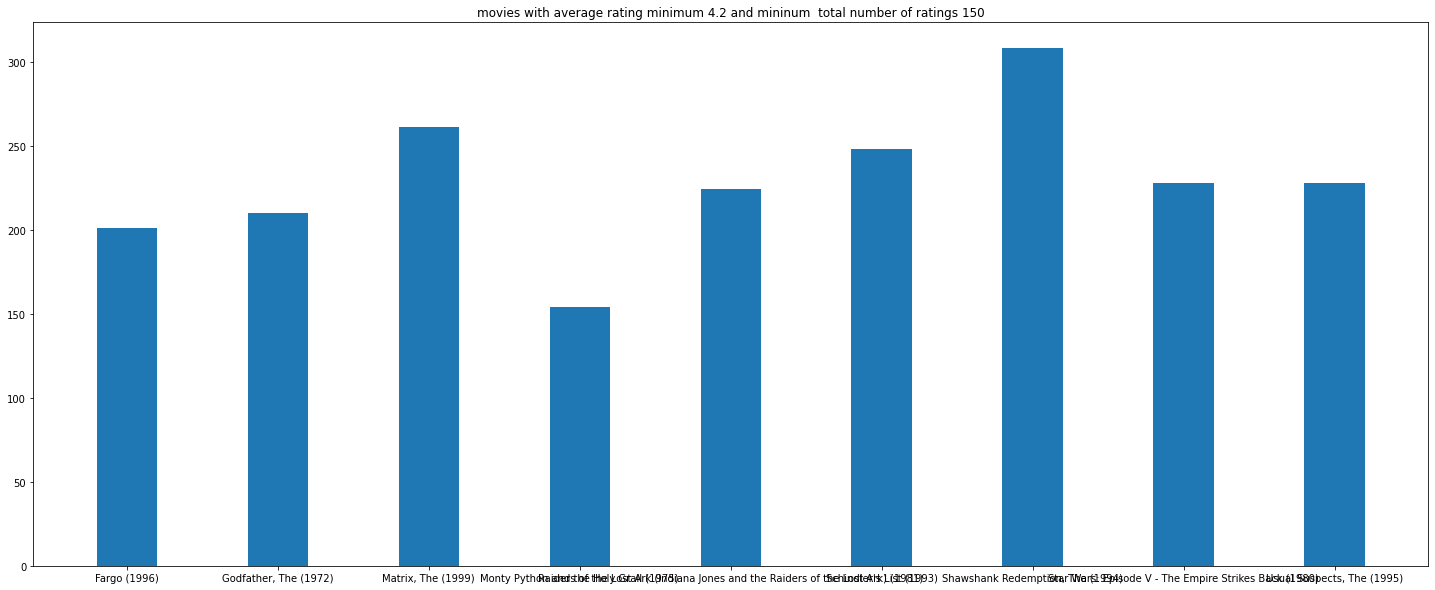

In [598]:
#plotting movies with average rating minimum 4.2 and mininum total number of ratings 150
plt.figure(figsize=(25,10))
plt.bar(trend_ratings_gt_4_no_200.index,trend_ratings_gt_4_no_200['total number of ratings'],width = 0.4)
plt.title("movies with average rating minimum 4.2 and mininum  total number of ratings 150")

In [599]:
#checking the dataframe records and columns
trend.shape


(10323, 2)

In [600]:
#here index is movie title 
trend.index

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Til There Was You (1997)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       '...And Justice for All (1979)', '10 (1979)',
       ...
       '[REC] (2007)', '[REC]² (2009)', '[REC]³ 3 Génesis (2012)',
       'a/k/a Tommy Chong (2005)', 'eXistenZ (1999)',
       'loudQUIETloud: A Film About the Pixies (2006)', 'xXx (2002)',
       'xXx: State of the Union (2005)', '¡Three Amigos! (1986)',
       'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=10323)

###Create a popularity-based recommender system at a genre level. 
The user will input a genre (g), minimum ratingthreshold (t) for a movie,and no. ofrecommendations(N) for which it should be recommended top N movies which are most popular within that genre (g) ordered by ratings in descending order where each movie has at least (t) reviews.Example:Input:•Genre (g) : Comedy•Minimumreviewsthreshold(t):100•Num recommendations (N) : 5

In [601]:
#defining the function to replace '|' with '' - basically for preprocessing the text data
def preprocess(value):
    return value.replace("|",' ')


In [602]:
#creating instance of TfidfVectorizer, transforming the data and applying preprocess function on dataframe columns 

cv=TfidfVectorizer()
movie_df['genres']=movie_df['genres'].apply(preprocess)
tfidf_matrix=cv.fit_transform(movie_df['genres'])
movie_df['genres']

0        Adventure Animation Children Comedy Fantasy
1                         Adventure Children Fantasy
2                                     Comedy Romance
3                               Comedy Drama Romance
4                                             Comedy
                            ...                     
10324                      Animation Children Comedy
10325                                         Comedy
10326                                         Comedy
10327                                          Drama
10328                             (no genres listed)
Name: genres, Length: 10329, dtype: object

In [603]:
#applying linear kernel
#taking similarity for genre as some movies may have multiple genres
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

cosine_sim.shape

(10329, 10329)

In [604]:
#creating an object with data type series
indices=pd.Series(movie_df.index,index=movie_df['genres'],name='genres_series')
titles=movie_df

Genre (g) : Comedy
•Minimumreviewsthreshold(t):100
•Num recommendations (N) : 5

In [605]:
#defining function for popularity based recommendation system with genre, Minimumreviewsthreshold and num_recommendations
def popularity_based_recommendations(genre,Minimumreviewsthreshold=100,num_recommendations=5):
    idx = indices[genre][0]  #taking only one index as genre is not unique
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) #sorting based on similarity scores as we need top 
    movie_indices = [i[0] for i in sim_scores][0:1000]  #taking index which is having high score
    final_data=titles.iloc[movie_indices]
    final_data= final_data.set_index('title') #setting index as title 
    final_data=final_data.merge(trend,on='title') #merging dataframe based on title column
    final_data=final_data[final_data['total number of ratings']>Minimumreviewsthreshold] #filter based on Minimumreviewsthreshold as we want only if the total number of ratings values are more than threshold
    final_data=final_data.sort_values(by='rating', ascending=False)  # sorting by rating column
    final_data.reset_index(drop=False,inplace=True) #reseting the index and changing in the original dataframe
    final_data=final_data[['title','rating','total number of ratings']] #taking the required columns
    return final_data.head(num_recommendations) #returning the top num_recommendations

In [606]:
#printing the movies with comedy genre, with more than 100 total number of ratings and with top 5 average ratings

popularity_based_recommendations("Comedy")

,title,rating,total number of ratings
0,Clerks (1994),3.980198,101
1,Ferris Bueller's Day Off (1986),3.960938,128
2,Monty Python's Life of Brian (1979),3.810680,103
3,"Breakfast Club, The (1985)",3.758475,118
4,"Birdcage, The (1996)",3.551887,106


In [607]:
#printing the movies with adventure genre, with more than 150 total number of ratings and with top 3 average ratings
popularity_based_recommendations("Adventure",150,3)

,title,rating,total number of ratings
0,Monty Python and the Holy Grail (1975),4.301948,154
1,Star Wars: Episode V - The Empire Strikes Back...,4.228070,228
2,Raiders of the Lost Ark (Indiana Jones and the...,4.212054,224


###Create a content-based recommender system that recommends top N movies based on similar movie(m) genres.

Example:
Input:

•Movie Title (t): Toy Story

•Num recommendations (N): 5

In [608]:
#defining function for content based recommendation system which takes title and output the top N movies based on same genre
indices_cbr=pd.Series(movie_df.index,index=movie_df['title'],name='titles_series')
titles=movie_df
def content_based_recommendations(title,num_recommendations=5):
    idx = indices_cbr[title] #taking the index of movie
    sim_scores = list(enumerate(cosine_sim[idx])) #taking similarity scores of genre and converting to list
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # sorting based on similarity scores
    movie_indices = [i[0] for i in sim_scores if i[0]!=idx] #excluding the movie the user has already seen
    final_data_cbr=titles.iloc[movie_indices] #taking the recommended ones
    final_data_cbr.reset_index(inplace=True)
    final_data_cbr=final_data_cbr[['title']] #taking only movie titles
    return final_data_cbr.head(num_recommendations) #recommending top movies

In [609]:
#calling content_based_recommendations function to recommend top 5 movies which are of same genre as 'Toy Story (1995)' 
content_based_recommendations('Toy Story (1995)')

,title
0,Antz (1998)
1,Toy Story 2 (1999)
2,"Adventures of Rocky and Bullwinkle, The (2000)"
3,"Emperor's New Groove, The (2000)"
4,"Monsters, Inc. (2001)"


In [610]:
#calling content_based_recommendations function to recommend top 8 movies which are of same genre as 'Jumanji (1995)' 

content_based_recommendations('Jumanji (1995)',8)

,title
0,"Indian in the Cupboard, The (1995)"
1,"NeverEnding Story III, The (1994)"
2,Escape to Witch Mountain (1975)
3,Darby O'Gill and the Little People (1959)
4,Return to Oz (1985)
5,"NeverEnding Story, The (1984)"
6,"NeverEnding Story II: The Next Chapter, The (1..."
7,Santa Claus: The Movie (1985)


### Create a collaborative based recommender system which recommends top N movies based on “K” similar users for a target user “u”

Example:Input:

•UserID:1

•Num recommendations(N): 5

•Threshold for similar users (k: 100

In [611]:
#printing the columns of the given datasets and merges dataframe
print(ratings_df.columns,movie_df.columns,movie_data.columns)

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object') Index(['movieId', 'title', 'genres'], dtype='object') Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')


In [612]:
print("number of unique users in ratings dataset::", ratings_df.userId.nunique())

number of unique users in ratings dataset:: 668


In [613]:

print("number of unique movie in ratings dataset::",ratings_df.movieId.nunique())

number of unique movie in ratings dataset:: 10325


In [614]:
#User based collaborative filtering so taking userid as index
array = movie_data.pivot_table(index='userId', columns='title', values='rating')
array.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [615]:
# Normalize user-item matrix
array_norm = array.subtract(array.mean(axis=1), axis = 'rows')
array_norm.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [616]:
# User similarity matrix using Pearson correlation
#for pearson correlation value is more then they are similar users i.e 1
user_similarity = array_norm.T.corr()
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.306186,0.440012,0.504099,-0.094491,0.579821,0.190592,0.423659,0.354381,-1.000000,...,0.304921,0.375769,0.414539,0.359848,0.410803,-0.536212,0.038337,0.118424,0.147106,0.360385
2,-0.306186,1.000000,0.785714,-1.000000,NaN,NaN,-0.555556,0.256406,-0.110657,NaN,...,0.000000,NaN,0.604468,0.028677,0.408248,NaN,0.678401,-0.500000,-1.000000,0.480938
3,0.440012,0.785714,1.000000,-0.250000,0.162938,NaN,-0.201332,1.000000,0.167924,-0.188982,...,0.255742,0.252223,0.730769,0.020278,0.251040,-0.491398,0.484123,0.408248,0.064282,0.160345
4,0.504099,-1.000000,-0.250000,1.000000,-0.188982,NaN,-0.118798,-1.000000,0.500000,NaN,...,-0.052414,1.000000,-0.500000,0.238130,NaN,NaN,-0.883452,0.225981,0.693722,0.224482
5,-0.094491,NaN,0.162938,-0.188982,1.000000,-0.571548,0.120497,NaN,-0.158114,NaN,...,-0.444428,NaN,NaN,0.894125,NaN,-0.651900,-0.189340,-0.191492,-0.052658,-0.186282


In [617]:
# User similarity matrix using cosine similarity
from sklearn.metrics import pairwise
user_similarity_cosine = pairwise.cosine_similarity(array_norm.fillna(0))
user_similarity_cosine

array([[ 1.        , -0.00918274,  0.0939529 , ...,  0.04885388,
         0.03228929,  0.04651207],
       [-0.00918274,  1.        ,  0.07538233, ...,  0.01764717,
        -0.0278674 ,  0.03139787],
       [ 0.0939529 ,  0.07538233,  1.        , ...,  0.03962292,
         0.00227406,  0.01443462],
       ...,
       [ 0.04885388,  0.01764717,  0.03962292, ...,  1.        ,
         0.03740768,  0.05233367],
       [ 0.03228929, -0.0278674 ,  0.00227406, ...,  0.03740768,
         1.        ,  0.04543815],
       [ 0.04651207,  0.03139787,  0.01443462, ...,  0.05233367,
         0.04543815,  1.        ]])

In [618]:
Threshold_for_similar_users=100 #minimum number of similar users to consider
Num_recommendations=5 #how many top recommendations to be recommended
user_similarity_threshold=0.5 #how much similar the users must be
picked_userid=1 #for which user we need to recommended

In [619]:

def recommendation_func(users_and_scores,similar_user_movies,Num_recommendations):
  # A dictionary to store item scores
  item_score = {}
  # Loop through items
  for movie in similar_user_movies.columns:
    # Get the ratings for movie 'movie'
    item_rating = similar_user_movies[movie]
    # total_score stores the score
    total_score = 0
    # count store the number of scores
    count = 0
    # Loop through similar users
    for user in users_and_scores.index:
      # excluding the movie which don't have rating
      if pd.isna(item_rating[user]) == False:
        # Score is the sum of user similarity score multiply by the movie rating
        score = users_and_scores[user] * item_rating[user]
        # Add the score to the total score for the movie so far
        total_score += score
        # Add 1 to the count for every user
        count +=1
    # Get the mean score for the item
    item_score[movie] = total_score / count
  # creating a dataframe using dictionary 
  item_score = pd.DataFrame(item_score.items(), columns=['title', 'movie_score'])

  # Sort the movies by movie_score
  ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)
  ranked_item_score=ranked_item_score[['title']] #taking title column from the dataframe
  ranked_item_score.reset_index(drop=True,inplace=True)
  # Select top Num_recommendations movies
  
  return ranked_item_score.head(Num_recommendations)

In [620]:
def user_collaborative_based_recommender_system(Threshold_for_similar_users=100,Num_recommendations=5,user_similarity_threshold=0.5,picked_userid=1):
  #We are filtering the top 100 similar users with similarity > 0.5 for the userid 1 

  users_and_scores=user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:Threshold_for_similar_users]
  type(users_and_scores)
  # print(f'The top 100 similar users for user {picked_userid} are', users_and_scores)
  # Remove movies that have been watched

  picked_userid_watched = array_norm[array_norm.index == picked_userid].dropna(axis=1, how='all')
  picked_userid_watched
  # Movies that similar users watched. Remove movies that none of the similar users have watched
  similar_user_movies = array_norm[array_norm.index.isin(users_and_scores.index)].dropna(axis=1, how='all')
  return recommendation_func(users_and_scores,similar_user_movies,Num_recommendations)
   

In [621]:
#We are top 5 recommendations of the top 150 similar users with similarity > 0.7 for the userid 2 

print(user_collaborative_based_recommender_system(150,5,0.7,2))

                   title
0     Rookie, The (2002)
1     Simon Birch (1998)
2        Out Cold (2001)
3   Orange County (2002)
4  She's All That (1999)


In [622]:
#We are top 7 recommendations of the top 100 similar users with similarity > 0.78 for the userid 5

print(user_collaborative_based_recommender_system(100,7,0.78,5))

                                               title
0                   Fast and the Furious, The (2001)
1                      Mission: Impossible II (2000)
2                                       Crumb (1994)
3  Night at the Museum: Battle of the Smithsonian...
4           Cloudy with a Chance of Meatballs (2009)
5            Importance of Being Earnest, The (2002)
6                                        Bolt (2008)
